In [22]:
#a-Read the dataset file “Cancer.csv” (from github using the following command), and assign it to a Pandas DataFrame:
    #df  = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
#Check out the dataset. As you see, the dataset includes 9 numerical features. The last column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign   tumor). You will use all 9 features in this homework.

import numpy as np
import pandas as pd


In [23]:
#b- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=2.

from sklearn.model_selection import train_test_split

cancer_df  = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
features_col = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
X = cancer_df[features_col]
y = cancer_df['Malignant_Cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)



In [24]:
#c- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (h). Then, calculate and report the accuracy and AUC of your classifier. Later in part (g), you will plot the ROC curve as well. Use this command to define your tree: my_DecisionTree = DecisionTreeClassifier(random_state=2).

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

my_DecisionTree = DecisionTreeClassifier(random_state=2)
my_DecisionTree.fit(X_train,y_train)
y_predict_DecisionTree = my_DecisionTree.predict(X_test)
score_samples_from_my_DecisionTree = accuracy_score(y_test, y_predict_DecisionTree)
print(score_samples_from_my_DecisionTree)


0.8444444444444444


In [26]:
#d- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”.

#Note: you should write your own code to perform Bagging (don’t use scikit-learn functions for Bagging!)

#To do so, you need to perform bootstrapping first. You can write a “for” loop with loop variable i=0…28.  In each iteration of the loop, you have to:

    #make a bootstarp sample of the original “Training” Dataset (build in part(b)) with size of bootstarp_size = 0.8*(Size of the original dataset). You can use the following command to generate a random bootstrap dataset (“i" is the variable of the loop, so the random_state changes in each iteration):
    #resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)

    #Define and train a new base decision tree classifier on this dataset in each iteration:
    #Base_DecisionTree = DecisionTreeClassifier(random_state=2).

    #Test “this base classifier” on the original “Testing” Dataset build in part(b), and save the prediction results for all testing samples.

#Then, Perform Voting to make the final decision on each data sample based on the votes of all 29 classifiers. Finally, calculate and report the accuracy and AUC of your Bagging method.

#NOTE: You need to calculate the probability of “malignant cancer” to be able to find AUC and plot the ROC curve. As mentioned in the class, you can consider the average (mean) of the votes as the probability for each sample.

from sklearn.utils import resample
from sklearn.metrics import accuracy_score

samples_df = pd.DataFrame()

for i in range(29):
    
    #boostrap_size convert into integer using .8 of x.size
    bootstrap_size = int(0.8 * X_train.size)

    #resample X_train and y_train
    X_train_i = resample(X_train, n_samples = bootstrap_size, random_state = i, replace = True)
    y_train_i = resample(y_train, n_samples = bootstrap_size, random_state = i, replace = True)
    
    #2.define and train a new base discion tree classifier
    Base_DecisionTree = DecisionTreeClassifier(random_state =2)
    Base_DecisionTree.fit(X_train_i,y_train_i) 
    y_predict_dt = Base_DecisionTree.predict(X_test)
    
    samples_df['Sample', i + 1] = y_predict_dt
    #since this is a classification (if its regression we use average)we will perform voting by finding the mode of each row of the samples_df
    #note to self for future reference even though it says columns it actually gets the mode of each row or i can just use 1 instead of columns
    y_predict_bagging = samples_df.mode(axis='columns', numeric_only=True)

display(samples_df)
score_samples_from_bagging = accuracy_score(y_test, y_predict_bagging)


print('our accuracy score from bagging', score_samples_from_bagging)

,"(Sample, 1)","(Sample, 2)","(Sample, 3)","(Sample, 4)","(Sample, 5)","(Sample, 6)","(Sample, 7)","(Sample, 8)","(Sample, 9)","(Sample, 10)",...,"(Sample, 20)","(Sample, 21)","(Sample, 22)","(Sample, 23)","(Sample, 24)","(Sample, 25)","(Sample, 26)","(Sample, 27)","(Sample, 28)","(Sample, 29)"
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


our accuracy score from bagging 0.8888888888888888


In [27]:
#e- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:
    #from   sklearn.ensemble   import     AdaBoostClassifier
    #my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29, random_state = 2)
my_AdaBoost.fit(X_train,y_train)
y_predict_AdaBoost = my_AdaBoost.predict(X_test)
score_samples_from_my_AdaBoost = accuracy_score(y_test, y_predict_AdaBoost)
print(score_samples_from_my_AdaBoost)


0.9333333333333333


In [28]:
#f- In this section, we use an extremely popular Boosting algorithm called “XGBoost”. This algorithm is not included in sklearn, so you need to install the XGBoost library. Please see this for more infor: https://xgboost.readthedocs.io/en/latest/build.html (Links to an external site.)
    #Mac users can easily install it with “pip install xgboost”.
    #Repeat part (e) with XGBoost. Use this command to import and define your classifier:
    #from   xgboost   import   XGBClassifier
    #my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

!pip install xgboost
from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29, random_state = 2)
my_XGBoost.fit(X_train,y_train)
y_predict_XGBoost = my_XGBoost.predict(X_test)
score_samples_from_my_XGBoost = accuracy_score(y_test, y_predict_XGBoost)
print(score_samples_from_my_XGBoost)

[10:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9555555555555556


C:\Users\dangl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [29]:
#g- Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:
    #from   sklearn.ensemble    import    RandomForestClassifier
    #my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
y_predict_RandomForest = my_RandomForest.predict(X_test)
score_samples_from_my_RandomForest = accuracy_score(y_test, y_predict_RandomForest)
print(score_samples_from_my_RandomForest)

0.9555555555555556


Decision Tree AUC: 0.8403361344537814
Decision Tree Accuray Score: 0.8444444444444444
Bagging AUC: 0.8760504201680672
Bagging Accuray Score: 0.8888888888888888
AdaBoost AUC: 0.9233193277310925
AdaBoost Accuray Score: 0.9333333333333333
XGBoost AUC: 0.9411764705882353
XGBoost Accuray Score: 0.9555555555555556
Random Forest AUC: 0.9411764705882353
Random Forest Accuracy Score: 0.9555555555555556


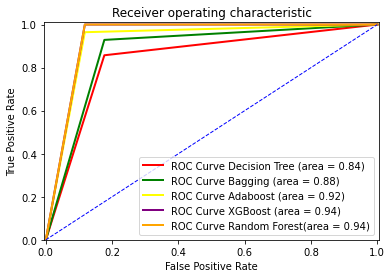

Which algorithm is the best w.r.t the AUC value? XGBoost & Random Forest
Which algorithm is the best w.r.t the Accuracy value? Random Forest
Which algorithm is the best when we want a False Positive Rate of %7? Adaboost


In [30]:
#h- Now, plot the ROC curves of your algorithms in parts (c), (d), (e), (f), (g) in a single plane with different colors along with the name of each method. Show the AUCs on the graph as well.

    #Which algorithm is the best w.r.t the AUC value?
    #Which algorithm is the best w.r.t the Accuracy value?
    #Which algorithm is the best when we want a False Positive Rate of %7?

from sklearn import metrics    
    
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_predict_DecisionTree)
AUC1 = metrics.auc(fpr1,tpr1)
score_DecisionTree = accuracy_score(y_test, y_predict_DecisionTree)
print('Decision Tree AUC:', AUC1)
print('Decision Tree Accuray Score:', score_DecisionTree)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_predict_bagging)
AUC2 = metrics.auc(fpr2,tpr2)
score_bagging_voting = accuracy_score(y_test, y_predict_from_bagging_voting)
print('Bagging AUC:', AUC2)
print('Bagging Accuray Score:', score_bagging_voting)

fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_predict_AdaBoost)
AUC3 = metrics.auc(fpr3,tpr3)
score_AdaBoost = accuracy_score(y_test, y_predict_AdaBoost)
print('AdaBoost AUC:', AUC3)
print('AdaBoost Accuray Score:', score_AdaBoost)

fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, y_predict_XGBoost)
AUC4 = metrics.auc(fpr4,tpr4)
score_XGBoost = accuracy_score(y_test, y_predict_XGBoost)
print('XGBoost AUC:', AUC4)
print('XGBoost Accuray Score:', score_XGBoost)

fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test, y_predict_RandomForest)
AUC5 = metrics.auc(fpr5,tpr5)
score_RandomForest = accuracy_score(y_test, y_predict_RandomForest)
print('Random Forest AUC:', AUC5)
print('Random Forest Accuracy Score:', score_RandomForest)

# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

# Roc Curve, plotted four FPR AND TPR
plt.plot(fpr1, tpr1, color='red', lw=2, 
         label='ROC Curve Decision Tree (area = %0.2f)' % AUC1)

plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve Bagging (area = %0.2f)' % AUC2)

plt.plot(fpr3, tpr3, color='yellow', lw=2, 
         label='ROC Curve Adaboost (area = %0.2f)' % AUC3)

plt.plot(fpr4, tpr4, color='purple', lw=2, 
         label='ROC Curve XGBoost (area = %0.2f)' % AUC4)

plt.plot(fpr5, tpr5, color='orange', lw=2, 
         label='ROC Curve Random Forest(area = %0.2f)' % AUC5)


# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

print('Which algorithm is the best w.r.t the AUC value? XGBoost & Random Forest')
print('Which algorithm is the best w.r.t the Accuracy value? Random Forest')
print('Which algorithm is the best when we want a False Positive Rate of %7? Adaboost')